In [1]:
import numpy as np
import pygimli as pg
import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle
from datetime import datetime
from glob import glob
from os import listdir
from os.path import isfile, join
import os
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
dir="//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2025summer/tuktuk_a12_tl/filtered/thaw/"



In [101]:
tuktuk_files = [f for f in sorted(listdir(dir)) if isfile(join(dir, f))]


#l=listdir(dir)
#times=[x.split('.')[0] for x in l]

timeposs=['22/08/2024 08:29',
          '26/08/2024 08:29',
          '30/08/2024 08:29',
          '03/09/2024 08:29',
          '07/09/2024 08:29',
          '11/09/2024 08:29',
          '15/09/2024 08:29',
          '19/09/2024 08:29',
          '23/09/2024 08:29',
          '27/09/2024 08:29',
          '01/10/2024 08:29',
          '05/10/2024 08:29',
          '09/10/2024 08:29',
          '13/10/2024 08:29',
          '17/10/2024 08:29',
          '21/10/2024 08:29',
          '25/10/2024 08:29',
          '29/10/2024 08:29',
          '02/11/2024 08:29',
          '06/11/2024 08:29',
          '10/11/2024 08:29',
          '14/11/2024 08:29',
          '18/11/2024 08:29',
          '22/11/2024 08:29',
          '26/11/2024 08:29',
          '30/11/2024 08:29',
          '04/12/2024 08:29',
          '08/12/2024 08:29',
          '12/12/2024 08:29',
          '21/03/2025 08:29',
          '22/03/2025 08:29',
          '26/03/2025 08:29',
          '30/03/2025 08:29',
          #'03/04/2025 08:29',
          '07/04/2025 08:29',
          '11/04/2025 08:29',
          '15/04/2025 08:29',
          '19/04/2025 08:29',
          '23/04/2025 08:29',
          '27/04/2025 08:29',
          '01/05/2025 08:29',
          '05/05/2025 08:29',
          '09/05/2025 08:29',
          '13/05/2025 08:29',
          '17/05/2025 08:29',
          '21/05/2025 08:29',
          '25/05/2025 08:29',
          '29/05/2025 08:29',
          '02/06/2025 08:29',
          '06/06/2025 08:29',
          '10/06/2025 08:29',
          '14/06/2025 08:29',
          '18/06/2025 08:29',
          '22/06/2025 08:29',
          '26/06/2025 08:29',
          '30/06/2025 08:29',
          '04/07/2025 08:29']
tuktuk_data = []

dates= [str(datetime.strptime(t, "%d/%m/%Y %H:%M")) for t in timeposs]

timepos= [datetime.fromisoformat(x) for x in dates]

In [113]:
tuktuk_files

['2025-03-22_08-29-16.tx0',
 '2025-03-26_08-29-16.tx0',
 '2025-03-30_08-29-16.tx0',
 '2025-04-07_08-29-16.tx0',
 '2025-04-11_08-29-16.tx0',
 '2025-04-15_08-29-16.tx0',
 '2025-04-19_08-29-16.tx0',
 '2025-04-23_08-29-16.tx0',
 '2025-04-27_08-29-16.tx0',
 '2025-05-01_08-29-16.tx0',
 '2025-05-05_08-29-16.tx0',
 '2025-05-09_08-29-16.tx0',
 '2025-05-13_08-29-16.tx0',
 '2025-05-17_08-29-16.tx0',
 '2025-05-21_08-29-16.tx0',
 '2025-05-25_08-29-16.tx0',
 '2025-05-29_08-29-16.tx0',
 '2025-06-02_08-29-16.tx0',
 '2025-06-06_08-29-16.tx0',
 '2025-06-10_08-29-16.tx0',
 '2025-06-14_08-29-16.tx0',
 '2025-06-18_08-29-16.tx0',
 '2025-06-22_08-29-16.tx0',
 '2025-06-26_08-29-16.tx0',
 '2025-06-30_08-29-16.tx0',
 '2025-07-04_08-29-16.tx0']

In [11]:
tuktuk_files = [f for f in sorted(listdir(dir)) if isfile(join(dir, f))]
#l=listdir(dir)
#times=[x.split('.')[0] for x in l]

timeposs=[
          '22/03/2025 08:29',
          '26/03/2025 08:29',
          '30/03/2025 08:29',
          #'03/04/2025 08:29',
          '07/04/2025 08:29',
          '11/04/2025 08:29',
          '15/04/2025 08:29',
          '19/04/2025 08:29',
          '23/04/2025 08:29',
          '27/04/2025 08:29',
          '01/05/2025 08:29',
          '05/05/2025 08:29',
          '09/05/2025 08:29',
          '13/05/2025 08:29',
          '17/05/2025 08:29',
          '21/05/2025 08:29',
          '25/05/2025 08:29',
          '29/05/2025 08:29',
          '02/06/2025 08:29',
          '06/06/2025 08:29',
          '10/06/2025 08:29',
          '14/06/2025 08:29',
          '18/06/2025 08:29',
          '22/06/2025 08:29',
          '26/06/2025 08:29',
          '30/06/2025 08:29',
          '04/07/2025 08:29']
tuktuk_data = []

dates= [str(datetime.strptime(t, "%d/%m/%Y %H:%M")) for t in timeposs]

timepos= [datetime.fromisoformat(x) for x in dates]

In [88]:
tuktuk_files = [f for f in listdir(dir) if isfile(join(dir, f))]
#l=listdir(dir)
#times=[x.split('.')[0] for x in l]

timeposs=['22/08/2024 08:29',
          '26/08/2024 08:29',
          '30/08/2024 08:29',
          '03/09/2024 08:29',
          '07/09/2024 08:29',
          '11/09/2024 08:29',
          '15/09/2024 08:29',
          '19/09/2024 08:29',
          '23/09/2024 08:29',
          '27/09/2024 08:29',
          '01/10/2024 08:29',
          '05/10/2024 08:29',
          '09/10/2024 08:29',
          '13/10/2024 08:29',
          '17/10/2024 08:29',
          '21/10/2024 08:29',
          '25/10/2024 08:29',
          '29/10/2024 08:29',
          '02/11/2024 08:29',
          '06/11/2024 08:29',
          '10/11/2024 08:29',
          '14/11/2024 08:29',
          '18/11/2024 08:29',
          '22/11/2024 08:29',
          '26/11/2024 08:29',
          '30/11/2024 08:29',
          '04/12/2024 08:29',
          '08/12/2024 08:29',
          '12/12/2024 08:29',
          '31/03/2025 08:29',
          '22/03/2025 08:29',
          '26/03/2025 08:29',
          '30/03/2025 08:29',
          #'03/04/2025 08:29',
          '07/04/2025 08:29',
          '11/04/2025 08:29',
          '15/04/2025 08:29',
          '19/04/2025 08:29',
          '23/04/2025 08:29',
          '27/04/2025 08:29',
          '01/05/2025 08:29',
          '05/05/2025 08:29',
          '09/05/2025 08:29',
          '13/05/2025 08:29',
          '17/05/2025 08:29',
          '21/05/2025 08:29',
          '25/05/2025 08:29',
          '29/05/2025 08:29',
          '02/06/2025 08:29',
          '06/06/2025 08:29',
          '10/06/2025 08:29',
          '14/06/2025 08:29',
          '18/06/2025 08:29',
          '22/06/2025 08:29',
          '26/06/2025 08:29',
          '30/06/2025 08:29',
          '04/07/2025 08:29']
tuktuk_data = []

dates= [str(datetime.strptime(t, "%d/%m/%Y %H:%M")) for t in timeposs]

timepos= [datetime.fromisoformat(x) for x in dates]

In [12]:

for i in tuktuk_files:
    data = ert.load(dir+i)
    tuktuk_data.append(data)


data_topo = pd.read_csv('//smb.isipd.dmawi.de/projects/sparc/personal_accounts/Mehriban/expedition2025summer/t12_h1_mon_topo.txt', sep='\s+', header=None)

for y in tuktuk_data:
    for i in range(data.sensorCount()):
        x_new = data_topo[0][i]  # Get x-value from diag1_topo[0]
        y_new = data_topo[1][i]  # Get y-value from diag1_topo[1]
        y.setSensorPosition(i, [x_new, y_new])

for data in tuktuk_data:
    data["k"] = ert.createGeometricFactors(data, numerical=True)
    #data.markInvalid(data['rhoa']<=0)
    


11/09/25 - 21:53:30 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
11/09/25 - 21:53:30 - pyGIMLi - INFO - could not read res2dinv ... try Ascii columns
11/09/25 - 21:53:30 - pyGIMLi - INFO - Failed importing Ascii column file. Consider using pybert.
11/09/25 - 21:53:30 - pyGIMLi - INFO - No electrode positions found!
11/09/25 - 21:53:30 - pyGIMLi - INFO - imported:  Data: Electrodes: 24 data: 126
11/09/25 - 21:53:31 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
11/09/25 - 21:53:31 - pyGIMLi - INFO - could not read res2dinv ... try Ascii columns
11/09/25 - 21:53:31 - pyGIMLi - INFO - Failed importing Ascii column file. Consider using pybert.
11/09/25 - 21:53:31 - pyGIMLi - INFO - No electrode positions found!
11/09/25 - 21:53:31 - pyGIMLi - INFO - imported:  Data: Electrodes: 24 data: 126
11/09/25 - 21:53:32 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv
11/09/25 - 21:53:32 - pyGIMLi - INFO 

c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\visualization.py:75: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = pg.plt.figure()


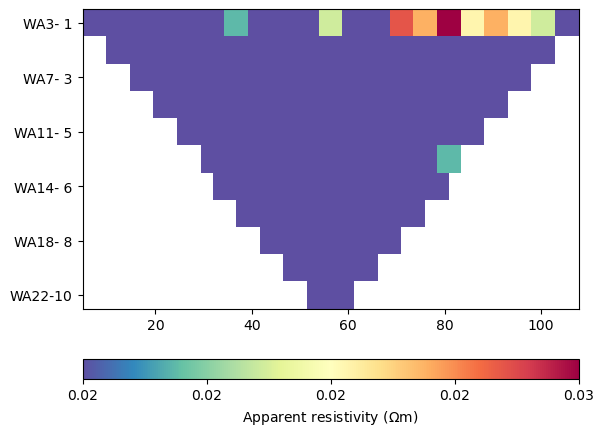

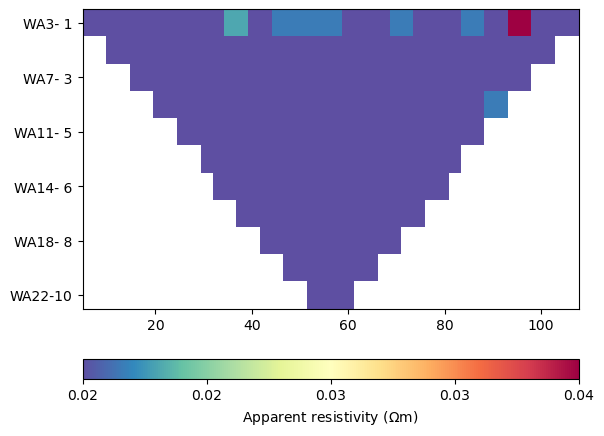

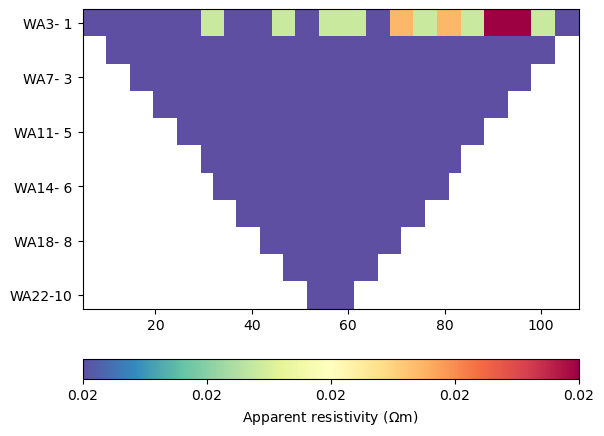

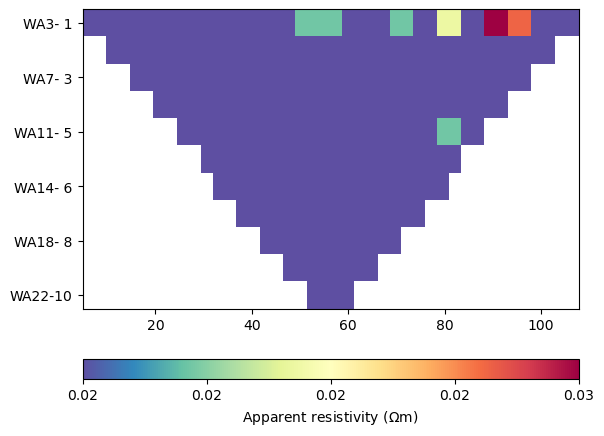

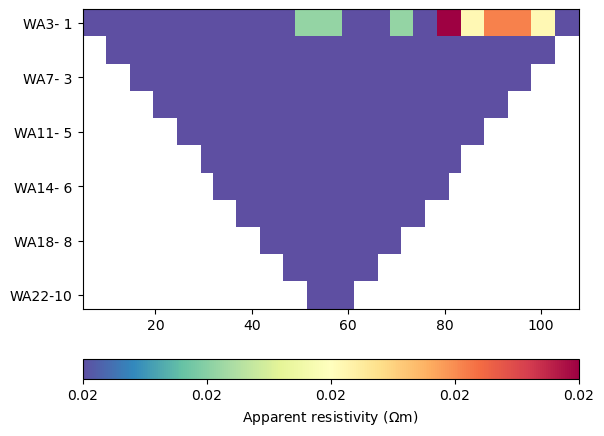

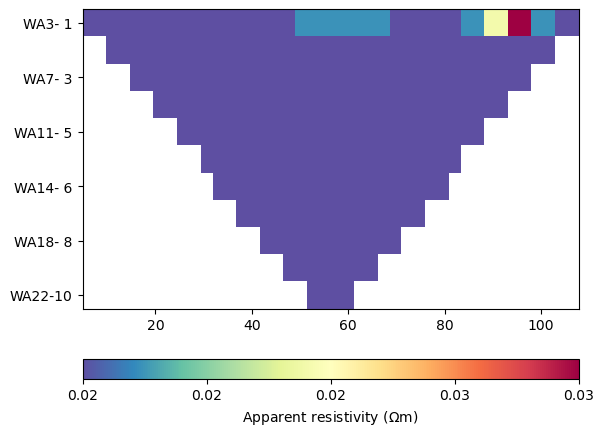

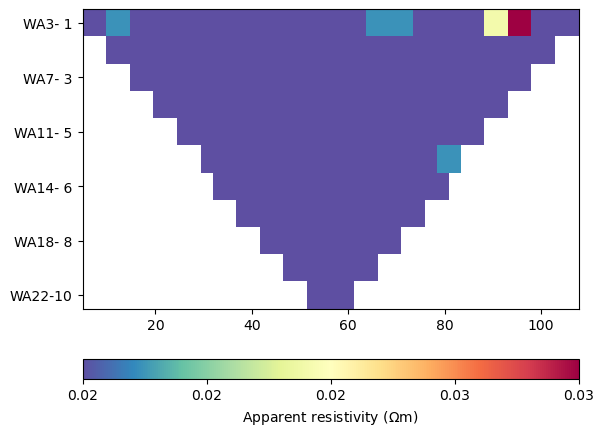

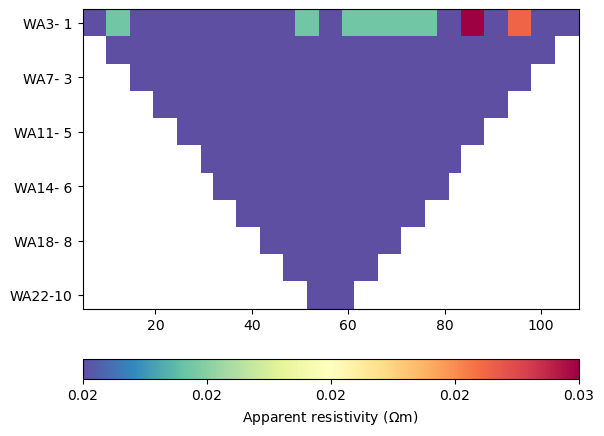

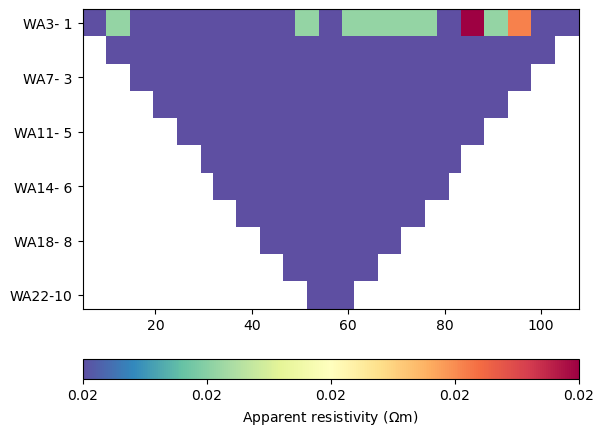

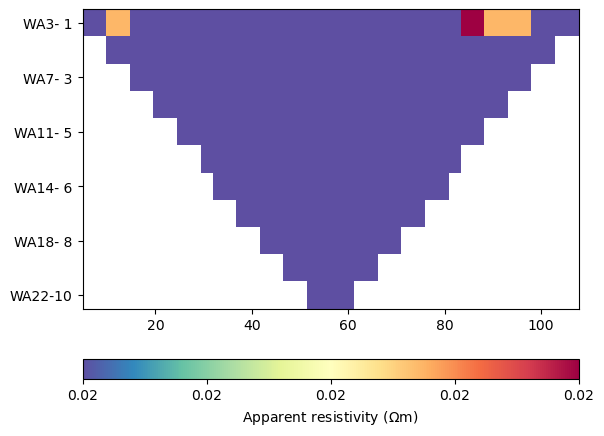

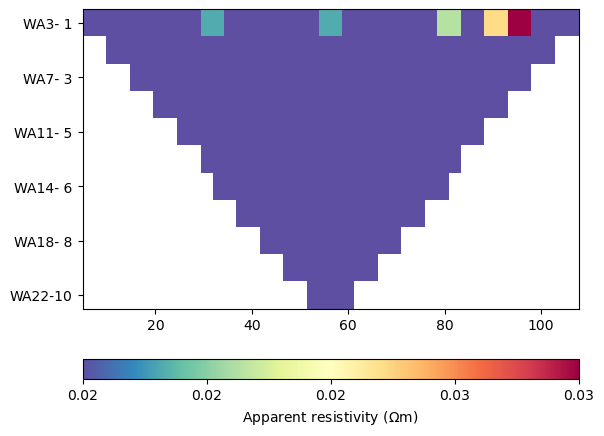

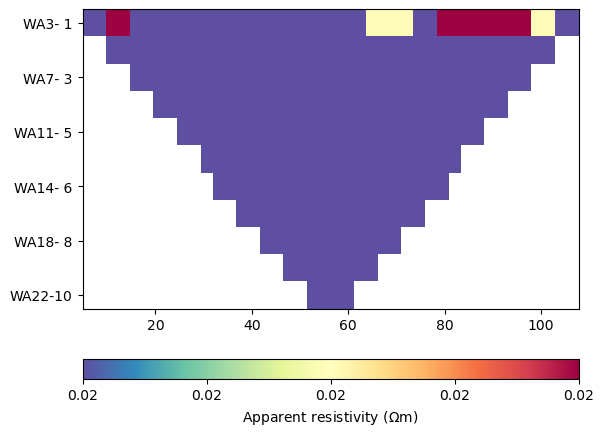

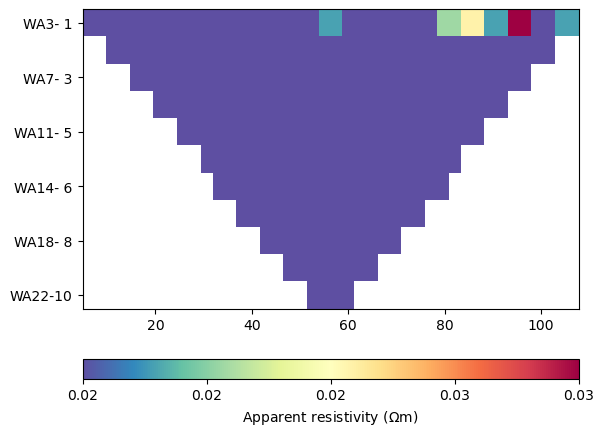

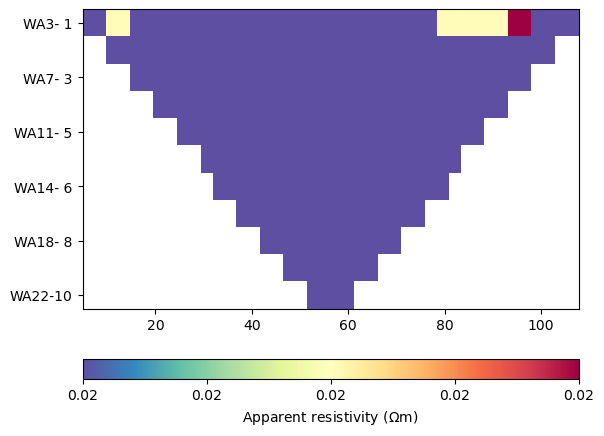

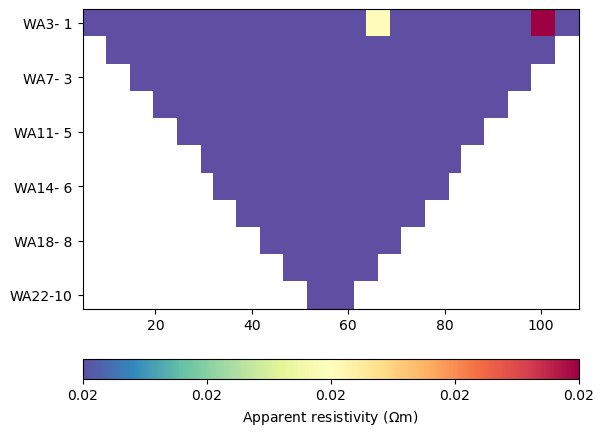

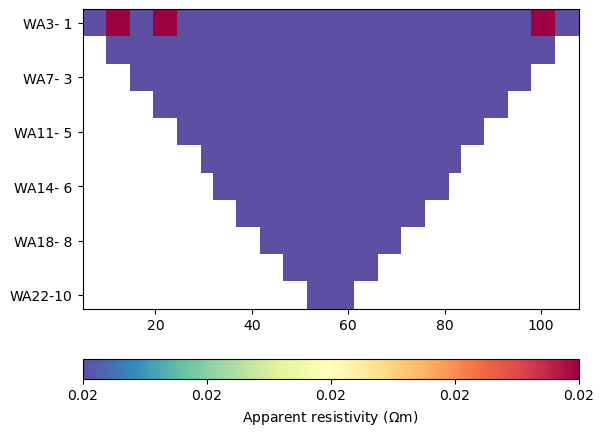

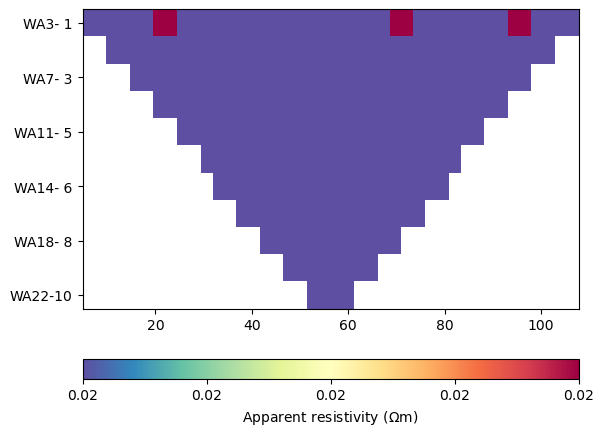

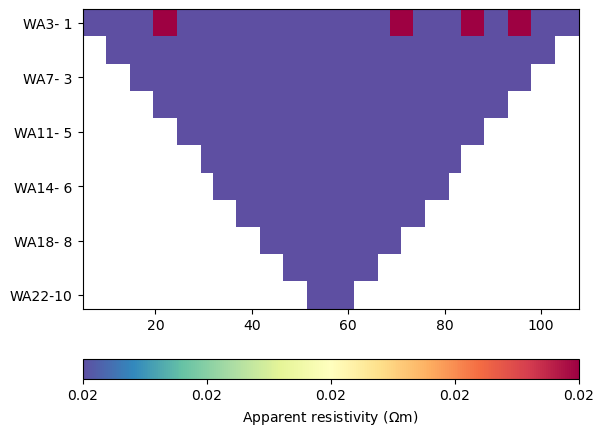

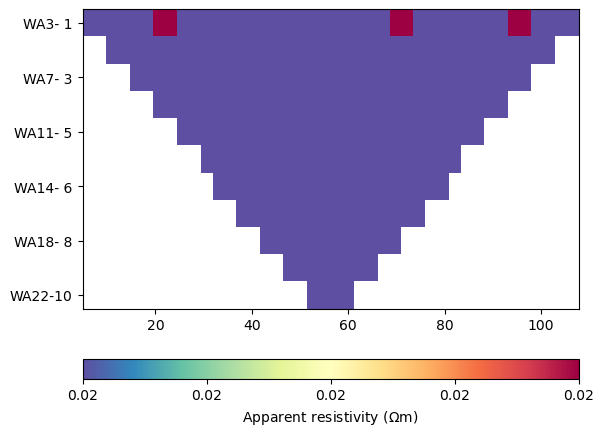

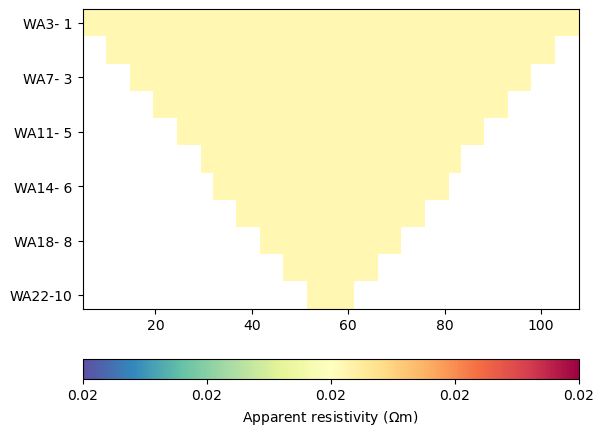

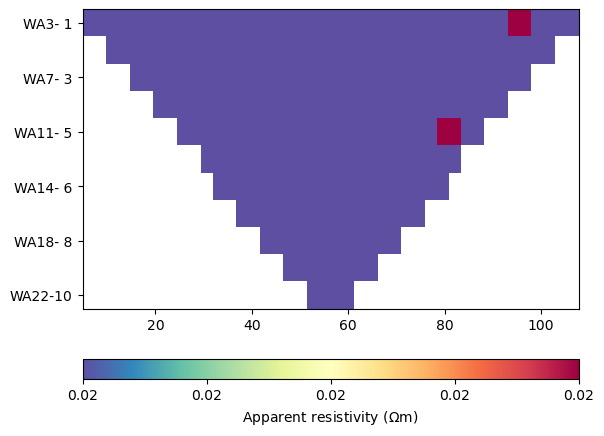

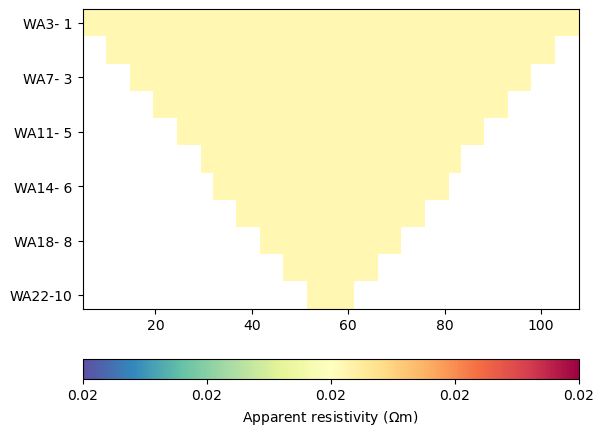

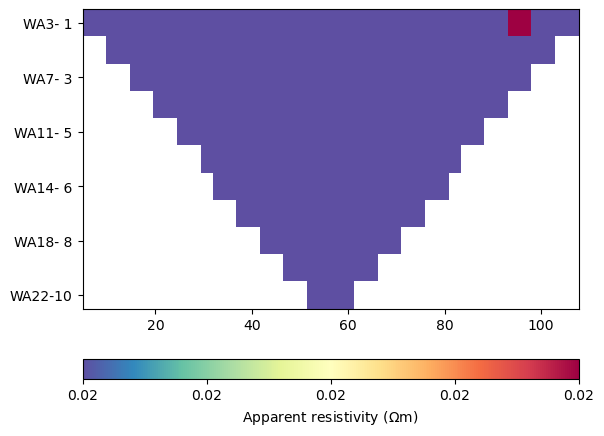

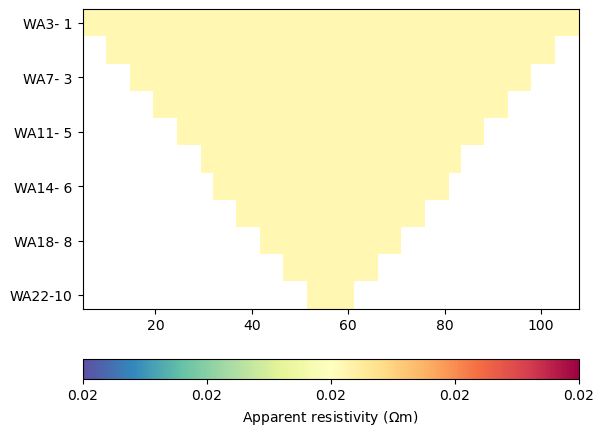

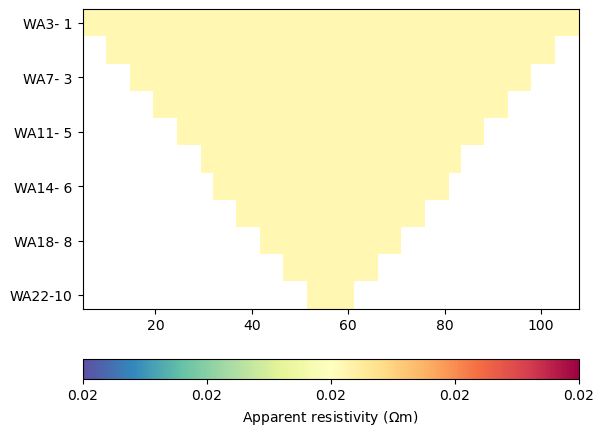

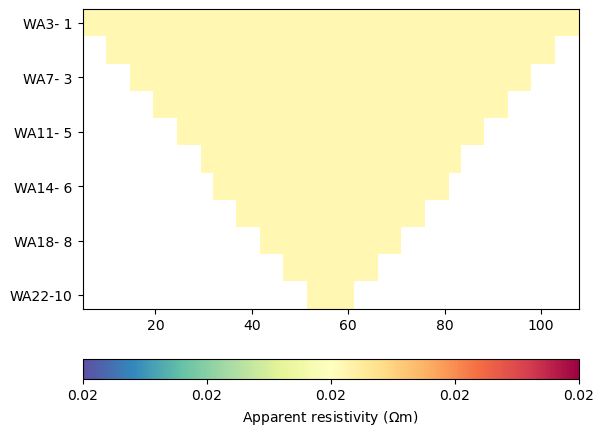

In [13]:
for i in tuktuk_data:
    
    i['err'] = i['err'] + 0.02
    ert.show(i, i['err'])

In [14]:
plc = mt.createParaMeshPLC(tuktuk_data[0], paraMaxCellSize=1)
mesh = mt.createMesh(plc)

In [15]:
tl = ert.TimelapseERT(tuktuk_data, times=timepos, mesh=mesh)

11/09/25 - 21:55:00 - pyGIMLi - INFO - Found 2 regions.
11/09/25 - 21:55:00 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
11/09/25 - 21:55:00 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 19): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\6914315771103630200


In [106]:
len(timepos)

56

In [16]:
tl

Timelapse ERT data:
Data: Electrodes: 24 data: 126
26 time steps from 2025-03-22 08:29 to 2025-07-04 08:29

In [17]:
tl.fullInversion(lam=50, verbose=True, scalef=2.0)

11/09/25 - 21:56:02 - pyGIMLi - INFO - Found 2 regions.
11/09/25 - 21:56:02 - pyGIMLi - INFO - Region with smallest marker (1) set to background
11/09/25 - 21:56:03 - pyGIMLi - INFO - Creating forward mesh from region infos.
11/09/25 - 21:56:03 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
11/09/25 - 21:56:04 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 23931 Cells: 47560 Boundaries: 35820
11/09/25 - 21:56:41 - pyGIMLi - INFO - Starting inversion.


10403 model cells
Mesh: Nodes: 23931 Cells: 47560 Boundaries: 35820
fop: <pygimli.frameworks.timelapse.MultiFrameModelling object at 0x000002252CFC24D0>
Data transformation: Identity transform
Model transformation: Logarithmic transform
min/max (data): 251/2994
min/max (error): 3%/3%
min/max (start model): 1353/1353
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  499.89
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   39.43 (dPhi = 90.15%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    8.55 (dPhi = 57.60%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    7.24 (dPhi = 4.82%) lam: 50.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    7.18 (dPhi = 0.57%) lam: 50.0
#########################

270478 [1504.611242699309,...,2585.0844897443403]

In [18]:
#tl.fullInversion()
tl.generateDataPDF()  # pseudosections
tl.generateModelPDF(cMin=100, cMax=5000)
tl.generateRatioPDF()

<Figure size 500x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

In [22]:
with PdfPages('ratio_diy.pdf') as pdf:
    for i in range(len(tl.models) - 1):  # Avoid index out of range for i+1
        fig, ax = plt.subplots(figsize=(8, 4))
        pg.show(tl.mgr.paraDomain, tl.models[i+1]/tl.models[0], ax=ax, cMap='coolwarm', cMin=0.5, cMax=2, logScale=1)
        # Format dates with dots as separators
        date1 = datetime.strptime(timeposs[i+1], "%d/%m/%Y %H:%M").strftime('%d.%m.%Y')
        date0 = datetime.strptime(timeposs[0], "%d/%m/%Y %H:%M").strftime('%d.%m.%Y')
        ax.set_title(f"{date1} / {date0}", fontsize=10)
        desired_ticks = np.arange(0, -21, -10)
        current_ticks2 = ax.get_yticks()
        relative_ticks2 = current_ticks2 - 7
        ax.set_yticklabels([f"{tick:.1f}" for tick in relative_ticks2])
        ax.set_yticks(desired_ticks + 7)
        ax.set_yticklabels([f"{tick}" for tick in desired_ticks])
        fig.tight_layout()
        fig.canvas.draw()
        pdf.savefig(fig)
        plt.close(fig)

C:\Users\mealiy001\AppData\Local\Temp\ipykernel_18464\3759983020.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{tick:.1f}" for tick in relative_ticks2])
C:\Users\mealiy001\AppData\Local\Temp\ipykernel_18464\3759983020.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{tick:.1f}" for tick in relative_ticks2])
C:\Users\mealiy001\AppData\Local\Temp\ipykernel_18464\3759983020.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{tick:.1f}" for tick in relative_ticks2])
C:\Users\mealiy001\AppData\Local\Temp\ipykernel_18464\3759983020.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  

In [125]:
tl.generateModelPDF(cMin=100, cMax=5000)

<Figure size 800x500 with 0 Axes>

<Axes: xlabel='time', ylabel='resistivity (Ohmm)'>

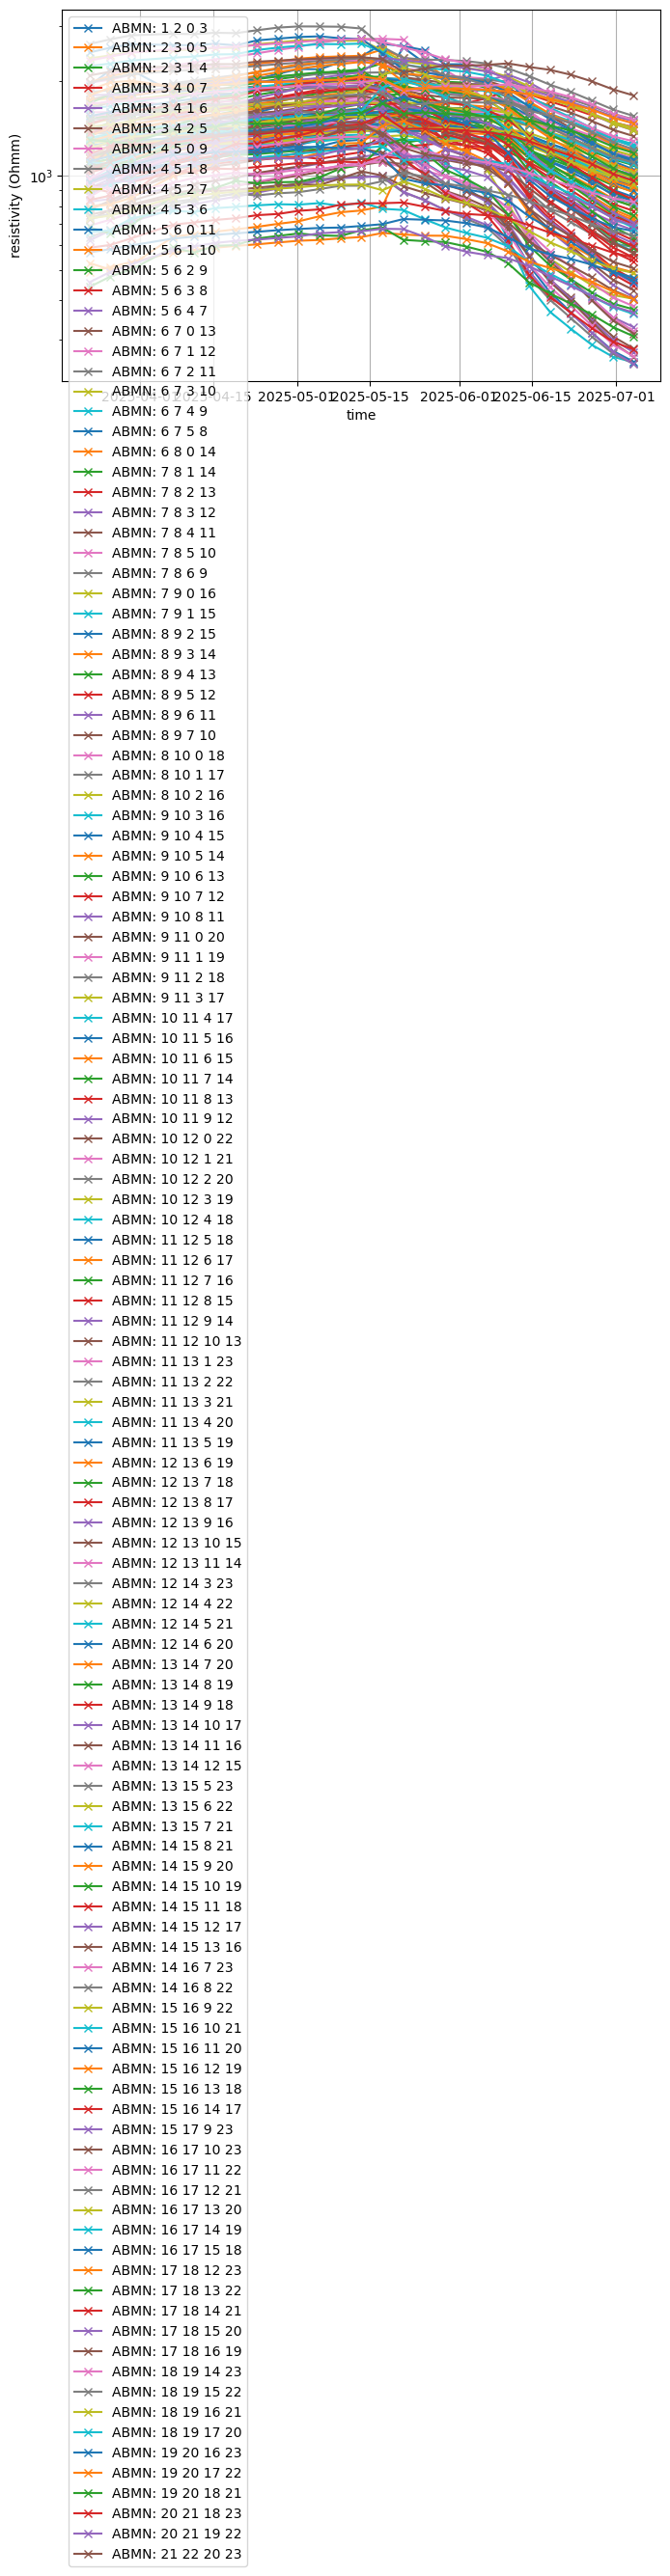

In [118]:
tl.showTimeline()

In [136]:
tl.invert(lam=20, verbose=True)

05/09/25 - 16:48:33 - pyGIMLi - INFO - Creating forward mesh from region infos.
05/09/25 - 16:48:33 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
05/09/25 - 16:48:34 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 5451 Cells: 10728 Boundaries: 8132
05/09/25 - 16:48:34 - pyGIMLi - INFO - Starting inversion.
05/09/25 - 16:48:34 - pyGIMLi - INFO - Setting starting model as reference!


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021330027970>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 441/2631
min/max (error): 3%/3%
min/max (start model): 100/100
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 6903.45
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   34.32 (dPhi = 99.43%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    6.57 (dPhi = 75.68%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    4.29 (dPhi = 26.46%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    3.63 (dPhi = 7.11%) lam: 20.0
---------------------------------------------------------

05/09/25 - 16:49:18 - pyGIMLi - INFO - Starting inversion.
05/09/25 - 16:49:18 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    3.62 (dPhi = 0.08%) lam: 20.0
################################################################################
#                Abort criterion reached: dPhi = 0.08 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021330027970>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 477/2723
min/max (error): 3%/3%
min/max (start model): 224/8479
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =    6.48
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    3.52 (dPhi = 40.53%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    3.37 (dPhi = 2.58%) lam: 20.0
-----------------------------------------------

05/09/25 - 16:49:50 - pyGIMLi - INFO - Starting inversion.
05/09/25 - 16:49:50 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    3.34 (dPhi = 0.16%) lam: 20.0
################################################################################
#                Abort criterion reached: dPhi = 0.16 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021330027970>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 502/2804
min/max (error): 3%/3%
min/max (start model): 224/8479
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   12.47
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    4.13 (dPhi = 63.02%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    4.01 (dPhi = 2.68%) lam: 20.0
-----------------------------------------------

05/09/25 - 16:50:23 - pyGIMLi - INFO - Starting inversion.
05/09/25 - 16:50:23 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    3.99 (dPhi = 0.15%) lam: 20.0
################################################################################
#                Abort criterion reached: dPhi = 0.15 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021330027970>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 568/2837
min/max (error): 3%/3%
min/max (start model): 224/8479
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   28.32
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    3.61 (dPhi = 85.47%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    3.46 (dPhi = 2.49%) lam: 20.0
-----------------------------------------------

05/09/25 - 16:50:58 - pyGIMLi - INFO - Starting inversion.
05/09/25 - 16:50:58 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    3.46 (dPhi = 0.01%) lam: 20.0
################################################################################
#                Abort criterion reached: dPhi = 0.01 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021330027970>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 568/2828
min/max (error): 3%/3%
min/max (start model): 224/8479
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   35.63
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    3.18 (dPhi = 89.60%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    3.02 (dPhi = 3.25%) lam: 20.0
-----------------------------------------------

05/09/25 - 16:51:28 - pyGIMLi - INFO - Starting inversion.
05/09/25 - 16:51:28 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    3.02 (dPhi = 0.01%) lam: 20.0
################################################################################
#                Abort criterion reached: dPhi = 0.01 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021330027970>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 589/2858
min/max (error): 3%/3%
min/max (start model): 224/8479
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   43.58
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    3.14 (dPhi = 91.49%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    2.94 (dPhi = 4.30%) lam: 20.0
-----------------------------------------------

05/09/25 - 16:52:00 - pyGIMLi - INFO - Starting inversion.
05/09/25 - 16:52:00 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    2.93 (dPhi = 0.04%) lam: 20.0
################################################################################
#                Abort criterion reached: dPhi = 0.04 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021330027970>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 597/2850
min/max (error): 3%/3%
min/max (start model): 224/8479
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   51.77
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    2.83 (dPhi = 93.29%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    2.57 (dPhi = 6.53%) lam: 20.0
-----------------------------------------------

05/09/25 - 16:52:33 - pyGIMLi - INFO - Starting inversion.
05/09/25 - 16:52:33 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    2.56 (dPhi = 0.11%) lam: 20.0
################################################################################
#                Abort criterion reached: dPhi = 0.11 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021330027970>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 604/2911
min/max (error): 3%/3%
min/max (start model): 224/8479
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   60.49
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    3.38 (dPhi = 93.28%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    3.01 (dPhi = 7.89%) lam: 20.0
-----------------------------------------------

05/09/25 - 16:53:11 - pyGIMLi - INFO - Starting inversion.
05/09/25 - 16:53:11 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    3.00 (dPhi = 0.16%) lam: 20.0
################################################################################
#                Abort criterion reached: dPhi = 0.16 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021330027970>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 612/2968
min/max (error): 3%/3%
min/max (start model): 224/8479
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   70.21
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    3.39 (dPhi = 94.11%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    2.94 (dPhi = 9.92%) lam: 20.0
-----------------------------------------------

05/09/25 - 16:53:47 - pyGIMLi - INFO - Starting inversion.
05/09/25 - 16:53:47 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    2.92 (dPhi = 0.22%) lam: 20.0
################################################################################
#                Abort criterion reached: dPhi = 0.22 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021330027970>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 620/2994
min/max (error): 3%/3%
min/max (start model): 224/8479
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   80.08
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    3.46 (dPhi = 94.68%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    2.90 (dPhi = 12.26%) lam: 20.0
----------------------------------------------

05/09/25 - 16:54:20 - pyGIMLi - INFO - Starting inversion.
05/09/25 - 16:54:20 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    2.88 (dPhi = 0.28%) lam: 20.0
################################################################################
#                Abort criterion reached: dPhi = 0.28 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021330027970>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 624/2992
min/max (error): 3%/3%
min/max (start model): 224/8479
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   91.16
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    3.89 (dPhi = 94.81%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    3.10 (dPhi = 15.81%) lam: 20.0
----------------------------------------------

05/09/25 - 16:54:54 - pyGIMLi - INFO - Starting inversion.
05/09/25 - 16:54:54 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    3.07 (dPhi = 0.36%) lam: 20.0
################################################################################
#                Abort criterion reached: dPhi = 0.36 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021330027970>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 631/2987
min/max (error): 3%/3%
min/max (start model): 224/8479
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  102.69
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    3.80 (dPhi = 95.39%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    2.85 (dPhi = 19.71%) lam: 20.0
----------------------------------------------

05/09/25 - 16:55:28 - pyGIMLi - INFO - Starting inversion.
05/09/25 - 16:55:28 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    2.80 (dPhi = 0.47%) lam: 20.0
################################################################################
#                Abort criterion reached: dPhi = 0.47 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021330027970>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 637/2948
min/max (error): 3%/3%
min/max (start model): 224/8479
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  110.93
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    3.74 (dPhi = 95.72%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    2.64 (dPhi = 22.80%) lam: 20.0
----------------------------------------------

05/09/25 - 16:56:01 - pyGIMLi - INFO - Starting inversion.
05/09/25 - 16:56:01 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    2.59 (dPhi = 0.61%) lam: 20.0
################################################################################
#                Abort criterion reached: dPhi = 0.61 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021330027970>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 656/2733
min/max (error): 3%/3%
min/max (start model): 224/8479
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  120.37
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    2.65 (dPhi = 96.71%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    1.63 (dPhi = 26.37%) lam: 20.0
----------------------------------------------

05/09/25 - 16:56:34 - pyGIMLi - INFO - Starting inversion.
05/09/25 - 16:56:34 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    1.58 (dPhi = 0.52%) lam: 20.0
################################################################################
#                Abort criterion reached: dPhi = 0.52 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021330027970>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 624/2716
min/max (error): 3%/3%
min/max (start model): 224/8479
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  103.98
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    2.29 (dPhi = 96.44%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    1.28 (dPhi = 28.83%) lam: 20.0
----------------------------------------------

05/09/25 - 16:57:10 - pyGIMLi - INFO - Starting inversion.
05/09/25 - 16:57:10 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    1.24 (dPhi = 0.32%) lam: 20.0
################################################################################
#                Abort criterion reached: dPhi = 0.32 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021330027970>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 618/2515
min/max (error): 3%/3%
min/max (start model): 224/8479
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   84.34
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    2.17 (dPhi = 95.87%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    1.21 (dPhi = 29.12%) lam: 20.0
----------------------------------------------

05/09/25 - 16:57:43 - pyGIMLi - INFO - Starting inversion.
05/09/25 - 16:57:43 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    1.17 (dPhi = 0.27%) lam: 20.0
################################################################################
#                Abort criterion reached: dPhi = 0.27 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021330027970>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 596/2354
min/max (error): 3%/3%
min/max (start model): 224/8479
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   64.56
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    2.14 (dPhi = 94.67%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    1.21 (dPhi = 28.79%) lam: 20.0
----------------------------------------------

05/09/25 - 16:58:23 - pyGIMLi - INFO - Starting inversion.
05/09/25 - 16:58:23 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    1.18 (dPhi = 0.18%) lam: 20.0
################################################################################
#                Abort criterion reached: dPhi = 0.18 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021330027970>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 572/2321
min/max (error): 3%/3%
min/max (start model): 224/8479
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   53.81
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    2.18 (dPhi = 93.60%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    1.19 (dPhi = 30.35%) lam: 20.0
----------------------------------------------

05/09/25 - 16:58:56 - pyGIMLi - INFO - Starting inversion.
05/09/25 - 16:58:56 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    1.16 (dPhi = 0.16%) lam: 20.0
################################################################################
#                Abort criterion reached: dPhi = 0.16 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021330027970>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 558/2279
min/max (error): 3%/3%
min/max (start model): 224/8479
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   46.97
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    2.42 (dPhi = 92.13%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    1.18 (dPhi = 35.40%) lam: 20.0
----------------------------------------------

05/09/25 - 16:59:26 - pyGIMLi - INFO - Starting inversion.
05/09/25 - 16:59:26 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    1.14 (dPhi = 0.33%) lam: 20.0
################################################################################
#                Abort criterion reached: dPhi = 0.33 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021330027970>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 526/2282
min/max (error): 3%/3%
min/max (start model): 224/8479
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   44.22
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    3.73 (dPhi = 88.29%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    1.19 (dPhi = 51.29%) lam: 20.0
----------------------------------------------

05/09/25 - 17:00:00 - pyGIMLi - INFO - Starting inversion.
05/09/25 - 17:00:00 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    1.13 (dPhi = 0.82%) lam: 20.0
################################################################################
#                Abort criterion reached: dPhi = 0.82 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021330027970>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 446/2224
min/max (error): 3%/3%
min/max (start model): 224/8479
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   63.41
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    5.09 (dPhi = 89.86%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    1.18 (dPhi = 55.79%) lam: 20.0
----------------------------------------------

05/09/25 - 17:00:33 - pyGIMLi - INFO - Starting inversion.
05/09/25 - 17:00:33 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    1.14 (dPhi = 1.40%) lam: 20.0
################################################################################
#                 Abort criterion reached: dPhi = 1.4 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021330027970>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 368/2177
min/max (error): 3%/3%
min/max (start model): 224/8479
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  102.32
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    5.68 (dPhi = 93.10%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    1.18 (dPhi = 55.84%) lam: 20.0
----------------------------------------------

05/09/25 - 17:01:05 - pyGIMLi - INFO - Starting inversion.
05/09/25 - 17:01:05 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    1.17 (dPhi = 1.66%) lam: 20.0
################################################################################
#                Abort criterion reached: dPhi = 1.66 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021330027970>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 325/2100
min/max (error): 3%/3%
min/max (start model): 224/8479
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  149.28
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    6.22 (dPhi = 94.84%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... 

05/09/25 - 17:01:37 - pyGIMLi - INFO - Starting inversion.
05/09/25 - 17:01:37 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    1.20 (dPhi = 56.41%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    1.19 (dPhi = 1.79%) lam: 20.0
################################################################################
#                Abort criterion reached: dPhi = 1.79 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021330027970>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 289/2000
min/max (error): 3%/3%
min/max (start model): 224/8479
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  217.76
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    6.93 (dPhi = 96.07%) lam: 20.0
----------------------------------------------

05/09/25 - 17:02:10 - pyGIMLi - INFO - Starting inversion.
05/09/25 - 17:02:10 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    1.22 (dPhi = 1.91%) lam: 20.0
################################################################################
#                Abort criterion reached: dPhi = 1.91 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021330027970>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 265/1887
min/max (error): 3%/3%
min/max (start model): 224/8479
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  299.63
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    7.75 (dPhi = 96.83%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    1.24 (dPhi = 58.83%) lam: 20.0
----------------------------------------------

05/09/25 - 17:02:43 - pyGIMLi - INFO - Starting inversion.
05/09/25 - 17:02:43 - pyGIMLi - INFO - Setting starting model as reference!


chi² =    1.25 (dPhi = 1.95%) lam: 20.0
################################################################################
#                Abort criterion reached: dPhi = 1.95 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000021330027970>
Data transformation: Logarithmic LU transform, lower bound 0.0, upper bound 0.0
Model transformation: Logarithmic transform
min/max (data): 251/1803
min/max (error): 3%/3%
min/max (start model): 224/8479
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  361.30
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    8.07 (dPhi = 97.25%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    1.26 (dPhi = 58.77%) lam: 20.0
----------------------------------------------

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x2143e261690>)

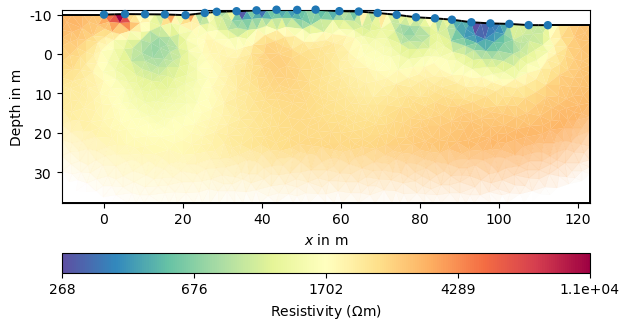

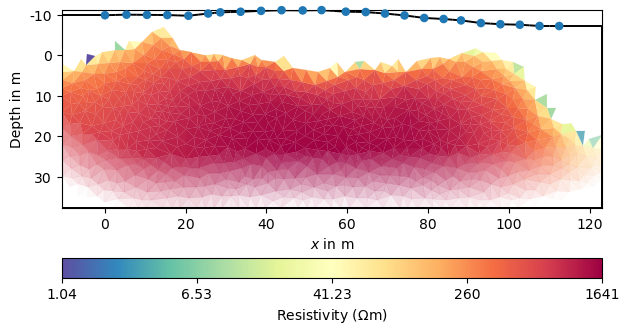

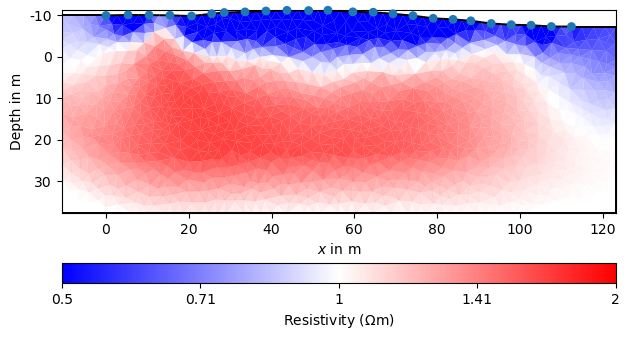

In [206]:
cell_average = tl.models.mean(axis=0)
geom = tl.models[25] - tl.models.mean()
tl.mgr.showResult(cell_average)
tl.mgr.showResult(tl.models[25]-cell_average) 
tl.mgr.showResult(tl.models[25]/cell_average, cMap='bwr', cMin=0.5, cMax=2) 

In [222]:
all_diffs = [tl.models[i] - cell_average for i in range(len(tl.models))]
vmax = np.nanmax([np.abs(diff).max() for diff in all_diffs])
vmin = np.nanmin([np.abs(diff).min() for diff in all_diffs])

with PdfPages(dir+'timelapse_diff_vs_cellaverage_abs.pdf') as pdf:
    for i in range(len(tl.models)):
        fig, ax = plt.subplots(figsize=(8, 4))
        diff = tl.models[i] - cell_average
        tl.mgr.showResult(diff, ax=ax, cMin=-vmax, cMax=vmax)
        ax.set_title(f"{timeposs[i]} - cellAverage", fontsize=10)
        fig.tight_layout()
        fig.canvas.draw()
        pdf.savefig(fig)
        plt.close(fig)

In [221]:
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages(dir+'timelapse_diff_vs_cellaverage_rel.pdf') as pdf:
    for i in range(len(tl.models)):
        fig, ax = plt.subplots(figsize=(8, 4))
        tl.mgr.showResult(tl.models[i]/cell_average, ax=ax, cMap='bwr', cMin=0.5, cMax=2)
        ax.set_title(f"{timeposs[i]} / cellAverage", fontsize=10)
        fig.tight_layout()
        fig.canvas.draw()
        pdf.savefig(fig)
        plt.close(fig)